In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",120)
loandata = pd.read_csv("loan.csv")
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [50]:
loandata.shape

(39717, 111)

In [51]:
loandata.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [52]:
loandata.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26526,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

In [53]:
loandata.columns
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [54]:
loandata.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [55]:
loandata.isnull().sum(axis=0).sort_values() #Check the null values

id                                0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
                              ...  
avg_cur_bal                   39717
bc_open_to_buy                39717
bc_util                       39717
mo_sin_old_rev_tl_op          39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [56]:
#remove columns null values
loandata = loandata.loc[:,loandata.isnull().sum(axis=0)!=39717]


In [57]:
loandata.shape
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [58]:
#some colums not usefull that columes removed
#Cleaning the data by removing some non-usable columns post checking data dictionary and data values
loandata = loandata.drop(columns= ['next_pymnt_d','last_pymnt_amnt','last_pymnt_d','url','desc','title','zip_code'])
loandata = loandata.drop(columns= ['pymnt_plan','collections_12_mths_ex_med','application_type','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','initial_list_status','tax_liens'])
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [62]:
#formating data colums
loandata["issue_d"]=pd.to_datetime(loandata["issue_d"],format = '%b-%y')
loandata["last_credit_pull_d"]=pd.to_datetime(loandata["last_credit_pull_d"],format = '%b-%y')

In [64]:
loandata["pub_rec"].value_counts()

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

In [65]:
loandata["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [67]:
loandata["issue_d"].value_counts()

issue_d
2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
              ... 
2007-08-01      33
2008-09-01      32
2007-07-01      30
2007-09-01      18
2007-06-01       1
Name: count, Length: 55, dtype: int64

In [68]:
loandata.loc[loandata["loan_status"]=="Charged Off","emp_title"].value_counts()

emp_title
Bank of America              20
US Army                      18
Walmart                      14
UPS                          12
AT&T                         12
                             ..
U of D Jesuit High School     1
EEOC                          1
Life Ambulance                1
R. Young Enterprise, Inc.     1
Auto motors of miami          1
Name: count, Length: 4636, dtype: int64

In [69]:
loandata.loc[loandata["emp_title"]=="Bank of America","emp_title"].value_counts()

emp_title
Bank of America    109
Name: count, dtype: int64

In [70]:
loandata.loc[loandata["emp_title"]=="US Army","emp_title"].value_counts()

emp_title
US Army    134
Name: count, dtype: int64

In [71]:
loandata_pivoted_home=loandata.pivot_table(index=["home_ownership"],values="id",columns="loan_status",aggfunc="count",fill_value=0)
loandata_pivoted_home.reset_index(inplace=True)
loandata_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,2327,638,14694
1,NONE,0,0,3
2,OTHER,18,0,80
3,OWN,443,83,2532
4,RENT,2839,419,15641


In [73]:
loandata_pivoted_home["total"]= loandata_pivoted_home["Charged Off"]+loandata_pivoted_home["Current"]+loandata_pivoted_home["Fully Paid"]
loandata_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid,total
0,MORTGAGE,2327,638,14694,17659
1,NONE,0,0,3,3
2,OTHER,18,0,80,98
3,OWN,443,83,2532,3058
4,RENT,2839,419,15641,18899


In [76]:
loandata_pivoted_home["Charged Off"]= (loandata_pivoted_home["Charged Off"]/loandata_pivoted_home["total"])*100
loandata_pivoted_home["Current"]= (loandata_pivoted_home["Current"]/loandata_pivoted_home["total"])*100
loandata_pivoted_home["Fully Paid"]= (loandata_pivoted_home["Fully Paid"]/loandata_pivoted_home["total"])*100

loandata_pivoted_home= loandata_pivoted_home.drop("total",axis=1)
loandata_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,0.000423,0.000116,0.002668
1,NONE,0.000000,0.000000,111111.111111
2,OTHER,19.124684,0.000000,84.998598
3,OWN,0.015491,0.002902,0.088542
4,RENT,0.000421,0.000062,0.002317


In [77]:
loandata_pivoted_home= loandata_pivoted_home.loc[loandata_pivoted_home["home_ownership"]!="NONE",]
loandata_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,0.000423,0.000116,0.002668
2,OTHER,19.124684,0.000000,84.998598
3,OWN,0.015491,0.002902,0.088542
4,RENT,0.000421,0.000062,0.002317


<Axes: xlabel='home_ownership'>

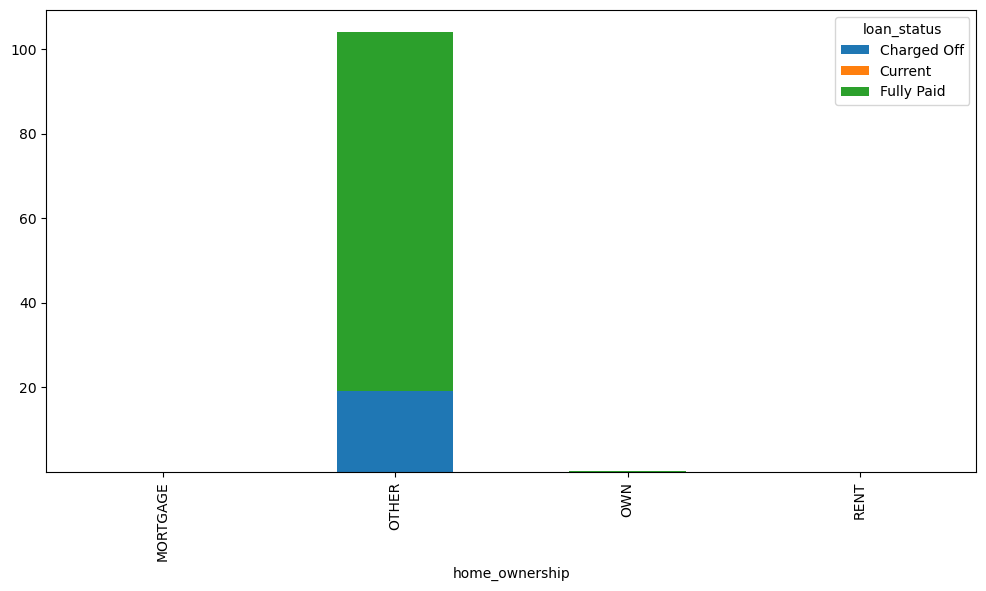

In [78]:
loandata_pivoted_home.plot(x="home_ownership",kind="bar",stacked=True,figsize=(12,6))

In [79]:
loandata.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [80]:
loandata.annual_inc.mean()

68968.92637711811

In [81]:
income_bin_ranges = [0,50000,100000,200000,500000]
income_bin_names= ["lower_income","lower_middle_class","upper_middle_class","high_income"]

In [82]:
loandata["income_bins"]= pd.cut(loandata["annual_inc"],bins=income_bin_ranges,labels=income_bin_names)
loandata["income_bins"].count()

39650

In [83]:
loandata_pivoted_2= loandata.pivot_table(index=["income_bins"],values="id",columns="loan_status",aggfunc="count")
loandata_pivoted_2.reset_index(inplace=True)
loandata_pivoted_2["total"]= loandata_pivoted_2["Charged Off"]+loandata_pivoted_2["Current"]+loandata_pivoted_2["Fully Paid"]
loandata_pivoted_2["Charged Off"]= round((loandata_pivoted_2["Charged Off"]/loandata_pivoted_2["total"])*100,2)
loandata_pivoted_2["Current"]= round((loandata_pivoted_2["Current"]/loandata_pivoted_2["total"])*100,2)
loandata_pivoted_2["Fully Paid"]= round((loandata_pivoted_2["Fully Paid"]/loandata_pivoted_2["total"])*100,2)
loandata_pivoted_2=loandata_pivoted_2.drop("total",axis=1)
loandata_pivoted_2

loan_status,income_bins,Charged Off,Current,Fully Paid
0,lower_income,16.60,2.25,81.15
1,lower_middle_class,13.25,3.17,83.59
2,upper_middle_class,10.43,3.72,85.85
3,high_income,9.44,2.89,87.67


<Axes: xlabel='income_bins'>

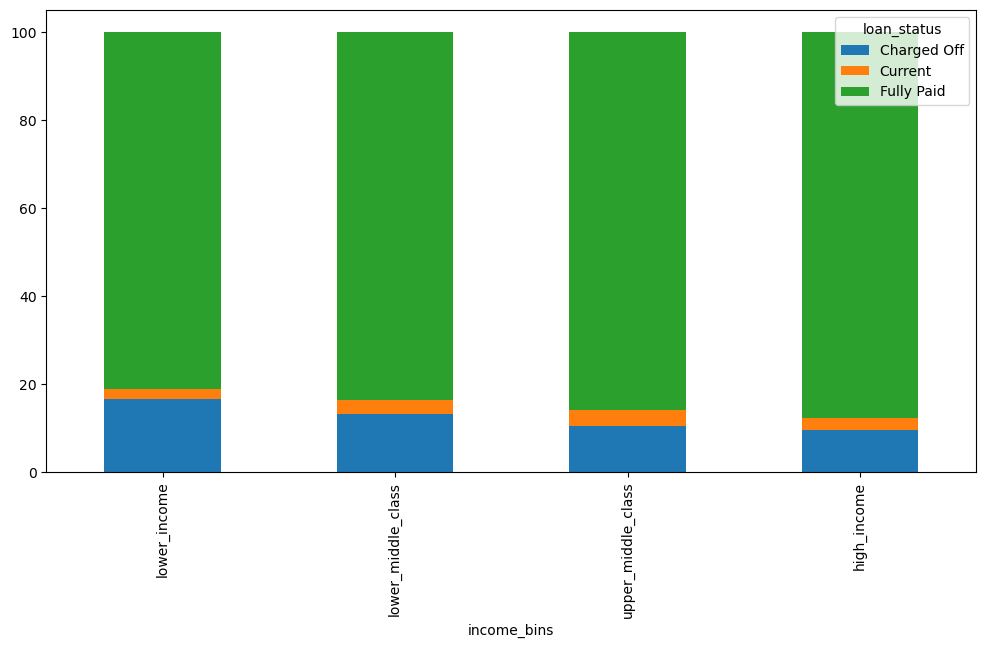

In [85]:
loandata_pivoted_2.plot(kind="bar",x="income_bins",stacked=True,figsize=(12,6))

In [86]:
loandata["verification_status"].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [87]:
loandata_verific_pivot= loandata.pivot_table(index="verification_status",columns="loan_status",values="id",aggfunc="count")
loandata_verific_pivot.reset_index(inplace=True)

loandata_verific_pivot

loan_status,verification_status,Charged Off,Current,Fully Paid
0,Not Verified,2142,227,14552
1,Source Verified,1434,310,8243
2,Verified,2051,603,10155


In [88]:
loandata_verific_pivot["Total"]= loandata_verific_pivot["Charged Off"]+loandata_verific_pivot["Current"]+loandata_verific_pivot["Fully Paid"]
loandata_verific_pivot["Charged Off"]= round((loandata_verific_pivot["Charged Off"]/loandata_verific_pivot["Total"])*100,2)
loandata_verific_pivot["Current"]= round((loandata_verific_pivot["Current"]/loandata_verific_pivot["Total"])*100,2)
loandata_verific_pivot["Fully Paid"]= round((loandata_verific_pivot["Fully Paid"]/loandata_verific_pivot["Total"])*100,2)
loandata_verific_pivot= loandata_verific_pivot.drop("Total",axis=1)
loandata_verific_pivot

loan_status,verification_status,Charged Off,Current,Fully Paid
0,Not Verified,12.66,1.34,86.00
1,Source Verified,14.36,3.10,82.54
2,Verified,16.01,4.71,79.28


<Axes: xlabel='verification_status'>

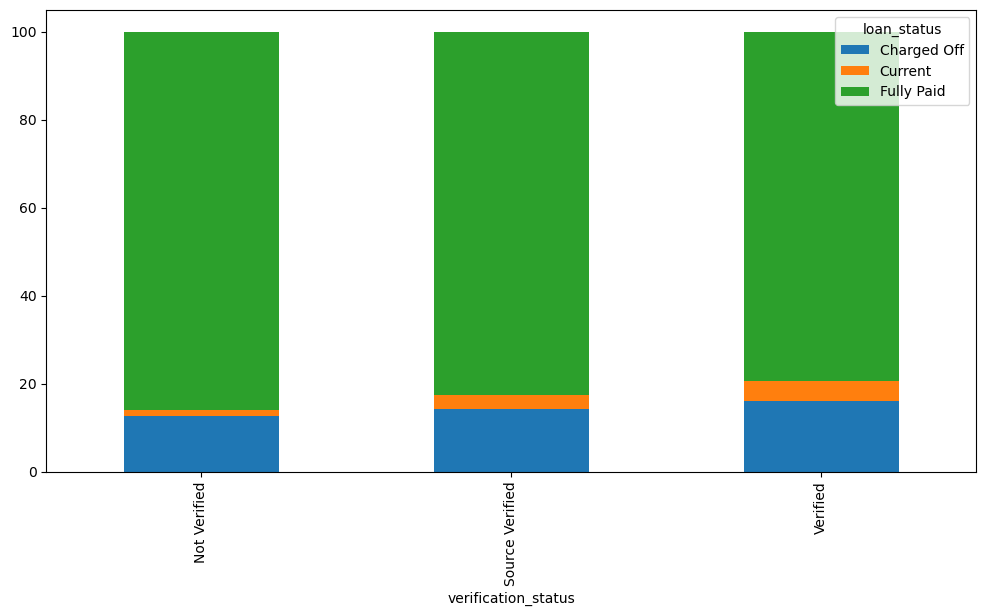

In [89]:
loandata_verific_pivot.plot(kind="bar",stacked=True,x="verification_status",figsize=(12,6))

In [90]:
#Analysing the purpose
loandata["purpose"].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [91]:
loandata_purpose=loandata.pivot_table(index="purpose",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_purpose.reset_index(inplace=True)
loandata_purpose

loan_status,purpose,Charged Off,Current,Fully Paid
0,car,160,50,1339
1,credit_card,542,103,4485
2,debt_consolidation,2767,586,15288
3,educational,56,0,269
4,home_improvement,347,101,2528
5,house,59,14,308
6,major_purchase,222,37,1928
7,medical,106,12,575
8,moving,92,7,484
9,other,633,128,3232


In [93]:
loandata_purpose["Total"]= loandata_purpose["Charged Off"]+loandata_purpose["Current"]+loandata_purpose["Fully Paid"]
loandata_purpose["Charged Off"]= round((loandata_purpose["Charged Off"]/loandata_purpose["Total"])*100,2)
loandata_purpose["Current"]= round((loandata_purpose["Current"]/loandata_purpose["Total"])*100,2)
loandata_purpose["Fully Paid"]= round((loandata_purpose["Fully Paid"]/loandata_purpose["Total"])*100,2)
loandata_purpose= loandata_purpose.drop("Total",axis=1)
loandata_purpose

loan_status,purpose,Charged Off,Current,Fully Paid
0,car,0.74,3.57,95.69
1,credit_card,0.23,2.24,97.53
2,debt_consolidation,0.09,3.69,96.22
3,educational,6.02,0.00,93.98
4,home_improvement,0.44,3.82,95.73
5,house,4.59,4.15,91.26
6,major_purchase,0.51,1.87,97.61
7,medical,2.54,1.99,95.47
8,moving,3.11,1.38,95.50
9,other,0.47,3.79,95.74


<Axes: xlabel='purpose'>

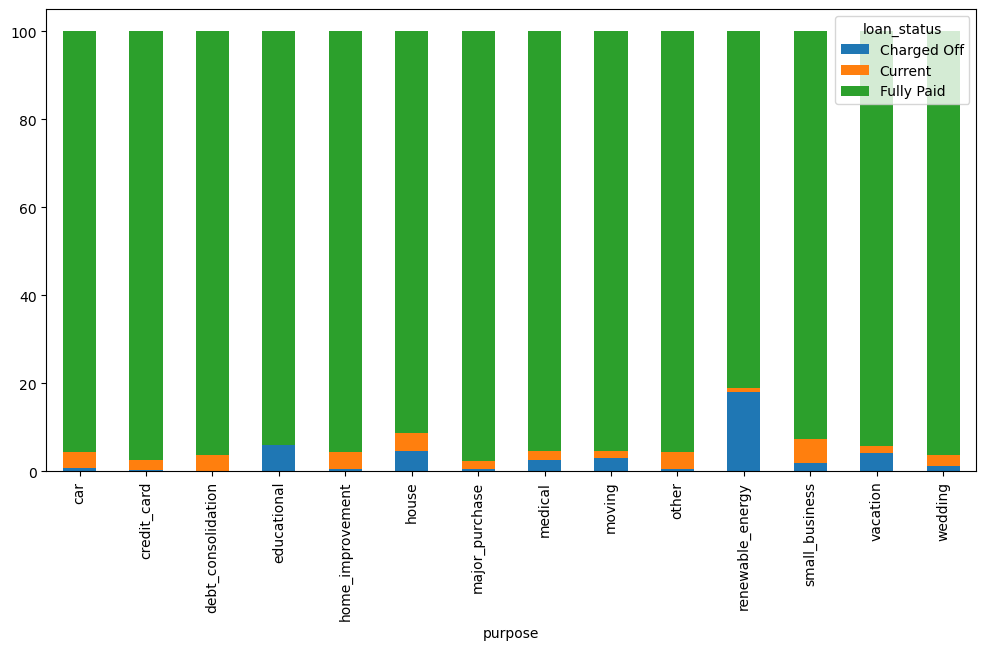

In [94]:
loandata_purpose.plot(kind="bar",stacked=True,x="purpose",figsize=(12,6))

In [95]:
loandata_pivot_state= loandata.pivot_table(index=["addr_state"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_pivot_state= loandata_pivot_state.reset_index()
loandata_pivot_state

loan_status,addr_state,Charged Off,Current,Fully Paid
0,AK,15,2,63
1,AL,54,17,381
2,AR,27,10,208
3,AZ,123,30,726
4,CA,1125,150,5824
5,CO,98,26,668
6,CT,94,25,632
7,DC,15,3,196
8,DE,12,1,101
9,FL,504,85,2277


In [96]:
loandata_pivot_state_filtered= loandata_pivot_state.loc[loandata_pivot_state["Charged Off"]+loandata_pivot_state["Current"]+loandata_pivot_state["Fully Paid"]>=10,]
loandata_pivot_state_filtered

loan_status,addr_state,Charged Off,Current,Fully Paid
0,AK,15,2,63
1,AL,54,17,381
2,AR,27,10,208
3,AZ,123,30,726
4,CA,1125,150,5824
5,CO,98,26,668
6,CT,94,25,632
7,DC,15,3,196
8,DE,12,1,101
9,FL,504,85,2277


In [98]:
def percentage_cal (df,x,y,z):
    df["total"]= df[x]+df[y]+df[z]
    df[x]=(df[x]/df["total"])*100
    df[y]=(df[y]/df["total"])*100
    df[z]=(df[z]/df["total"])*100
    
percentage_cal(loandata_pivot_state,"Charged Off","Current","Fully Paid")

percentage_cal(loandata_pivot_state_filtered,"Charged Off","Current","Fully Paid")
loandata_pivot_state_filtered=loandata_pivot_state_filtered.drop("total",axis=1)
loandata_pivot_state_filtered.sort_values(by="Charged Off",ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid
32,NV,21.730382,3.621730,74.647887
0,AK,18.750000,2.500000,78.750000
40,SD,18.750000,3.125000,78.125000
9,FL,17.585485,2.965806,79.448709
24,MO,16.618076,2.332362,81.049563
11,HI,16.091954,4.597701,79.310345
31,NM,15.873016,3.174603,80.952381
4,CA,15.847302,2.112974,82.039724
36,OR,15.742794,3.547672,80.709534
43,UT,15.503876,2.325581,82.170543


<Axes: xlabel='addr_state'>

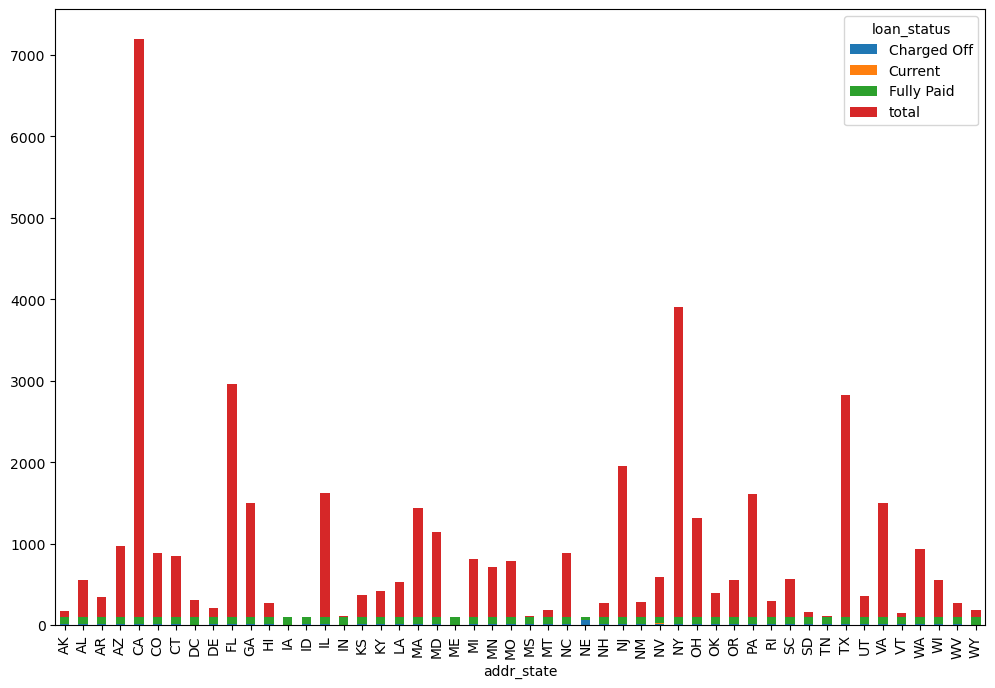

In [99]:
loandata_pivot_state.plot(kind="bar",stacked=True,x="addr_state",figsize= (12,8))

In [100]:
loandata.dti.value_counts()

dti
0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: count, Length: 2868, dtype: int64

In [102]:
loandata.loc[loandata["dti"]==0.00]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,income_bins
2629,1033741,1263519,25000,25000,24950.000000,36 months,7.90%,782.26,A,A4,NaN,10+ years,MORTGAGE,200000.0,Source Verified,2011-11-01,Fully Paid,home_improvement,MA,0.0,0,Feb-88,3,NaN,NaN,6,0,0,0%,14,0.0,0.0,25634.619510,25583.34,25000.00,634.62,0.0,0.00,0.000,2013-02-01,0.0,upper_middle_class
2938,1028983,1258336,15000,15000,15000.000000,36 months,7.51%,466.67,A,A3,bnsf railway,9 years,MORTGAGE,65004.0,Not Verified,2011-11-01,Fully Paid,other,MO,0.0,0,Dec-02,0,NaN,NaN,4,0,0,0%,14,0.0,0.0,16214.565510,16214.57,15000.00,1214.57,0.0,0.00,0.000,2013-04-01,0.0,lower_middle_class
3208,1023172,1251991,3500,3500,3500.000000,36 months,16.29%,123.56,D,D1,WiFiFee LLC.,3 years,MORTGAGE,50000.0,Not Verified,2011-11-01,Charged Off,major_purchase,NY,0.0,1,Apr-02,0,10.0,NaN,3,0,0,0%,16,0.0,0.0,4019.000000,4019.00,3019.28,930.32,0.0,69.40,0.694,2015-01-01,0.0,lower_income
4086,1008627,1235314,6500,6500,6500.000000,36 months,10.65%,211.73,B,B2,Donovan Hatem LLP,2 years,MORTGAGE,56650.0,Not Verified,2011-11-01,Fully Paid,debt_consolidation,MA,0.0,0,Oct-98,2,NaN,NaN,2,0,0,0%,7,0.0,0.0,7267.224670,7267.22,6500.00,767.22,0.0,0.00,0.000,2014-10-01,0.0,lower_middle_class
4545,1001046,1226814,5150,5150,5150.000000,36 months,7.90%,161.15,A,A4,Walmart Information Systems Division,7 years,RENT,68000.0,Verified,2011-11-01,Fully Paid,debt_consolidation,AR,0.0,0,Sep-97,2,78.0,NaN,6,0,0,0%,10,0.0,0.0,5801.189857,5801.19,5150.00,651.19,0.0,0.00,0.000,2016-04-01,0.0,lower_middle_class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,153022,153018,3000,3000,1825.000000,36 months,7.12%,92.80,A,A1,"Park Place Everett, LLC",5 years,MORTGAGE,93000.0,Not Verified,2007-11-01,Fully Paid,home_improvement,WA,0.0,0,Apr-85,0,0.0,0.0,7,0,368,1.20%,15,0.0,0.0,3339.035809,2031.25,3000.00,339.04,0.0,0.00,0.000,2010-10-01,NaN,lower_middle_class
39613,136491,136485,5000,5000,1574.995234,36 months,12.17%,166.48,D,D2,NaN,< 1 year,RENT,10000.0,Not Verified,2007-10-01,Charged Off,small_business,MD,0.0,1,Aug-01,2,15.0,0.0,5,0,875,54.70%,8,0.0,0.0,2477.030000,779.40,1756.71,574.25,0.0,146.07,1.480,2015-03-01,NaN,lower_income
39632,130907,130904,3775,3775,925.000000,36 months,7.43%,117.31,A,A2,SRA Benefits,7 years,MORTGAGE,120000.0,Not Verified,2007-10-01,Fully Paid,other,MO,0.0,0,Dec-96,1,64.0,0.0,10,0,0,0%,22,0.0,0.0,4191.717919,1027.11,3775.00,416.72,0.0,0.00,0.000,2016-03-01,NaN,upper_middle_class
39694,90966,90962,5000,5000,4150.000000,36 months,7.43%,155.38,A,A2,Oracle Corporation,8 years,MORTGAGE,150000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,GA,0.0,0,Dec-87,0,0.0,0.0,2,0,6053,19.50%,19,0.0,0.0,5174.186842,4294.58,5000.00,174.19,0.0,0.00,0.000,2007-06-01,NaN,upper_middle_class


In [103]:
dti_ranges= [-1,0,5,10,15,20,30]
dti_names= ["0","0-5","5-10","10-15","15-20","20-30"]

In [104]:
loandata["dti_bins"]= pd.cut(loandata["dti"],bins= dti_ranges,labels=dti_names)
loandata["dti_bins"].value_counts()

dti_bins
10-15    9899
15-20    9095
5-10     8072
20-30    7491
0-5      4977
0         183
Name: count, dtype: int64

<Axes: xlabel='dti_bins'>

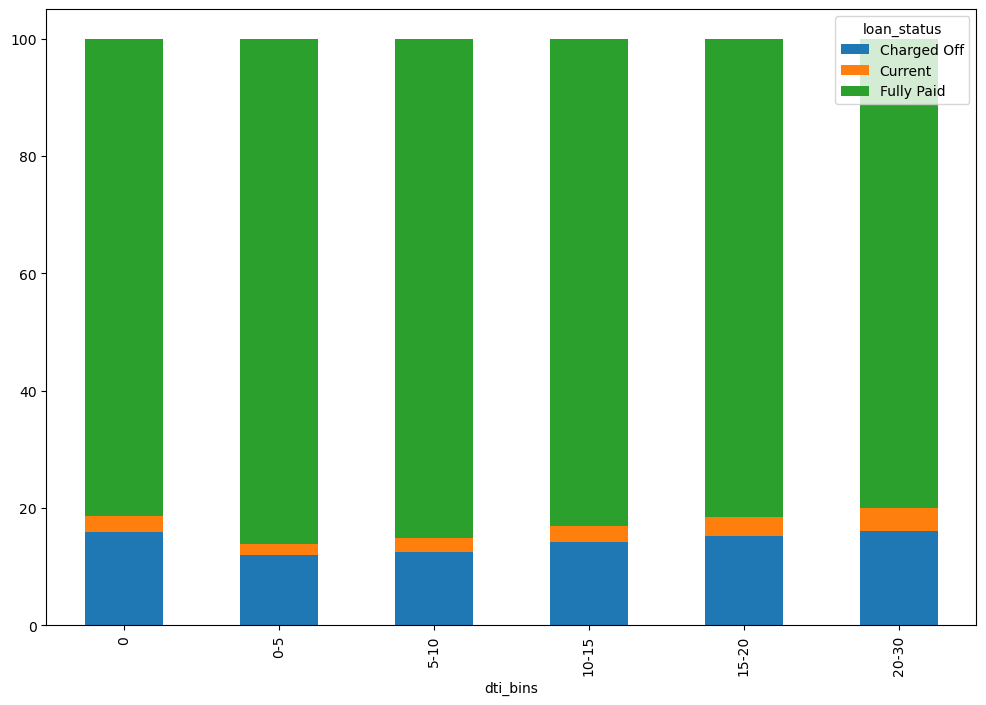

In [105]:
loandata_pivot_dti= loandata.pivot_table(index=["dti_bins"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_pivot_dti= loandata_pivot_dti.reset_index()
percentage_cal(loandata_pivot_dti,"Charged Off","Current","Fully Paid")
loandata_pivot_dti= loandata_pivot_dti.drop("total",axis=1)
loandata_pivot_dti.plot(kind="bar",stacked=True,x="dti_bins",figsize= (12,8))

In [106]:
loandata["delinq_2yrs"].value_counts()

delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [107]:
loandata_pivot_delinq= loandata.pivot_table(index="delinq_2yrs",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_pivot_delinq.reset_index(inplace=True)
percentage_cal(loandata_pivot_delinq,"Charged Off","Current","Fully Paid")
loandata_pivot_delinq
loandata_pivot_delinq=loandata_pivot_delinq.drop("total",axis=1)

<Axes: xlabel='delinq_2yrs'>

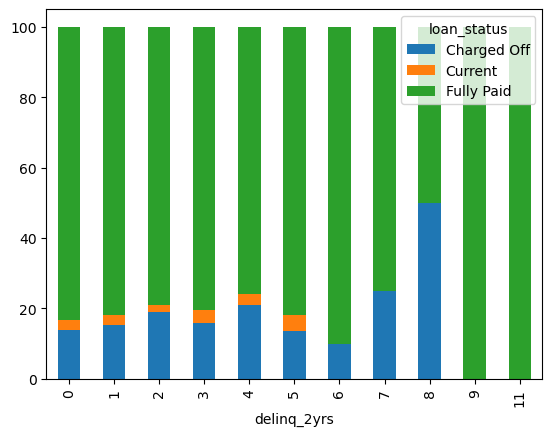

In [108]:
loandata_pivot_delinq.plot(kind="bar",stacked=True,x="delinq_2yrs")

In [109]:
loandata.inq_last_6mths.value_counts()

inq_last_6mths
0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: count, dtype: int64

In [110]:
loandata_pivot_inq= loandata.pivot_table(index="inq_last_6mths",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_pivot_inq.reset_index(inplace=True)
loandata_pivot_inq

loan_status,inq_last_6mths,Charged Off,Current,Fully Paid
0,0,2280,591,16429
1,1,1677,311,8983
2,2,943,158,4711
3,3,619,65,2364
4,4,51,10,265
5,5,28,2,116
6,6,16,1,47
7,7,10,1,24
8,8,3,1,11


In [111]:
percentage_cal(loandata_pivot_inq,"Charged Off","Current","Fully Paid")
loan_data_pivot_inq=loandata_pivot_inq.drop("total",axis=1)

<Axes: xlabel='inq_last_6mths'>

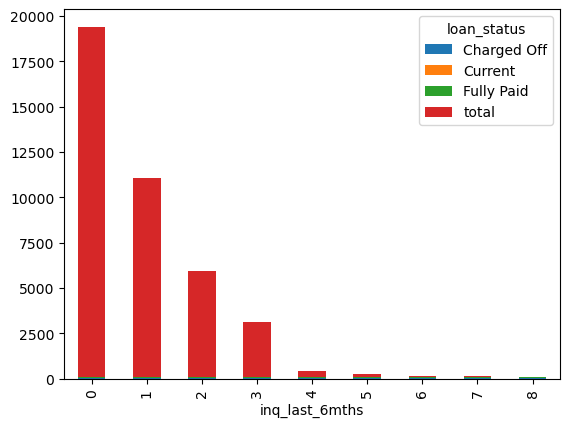

In [112]:
loandata_pivot_inq.plot(kind="bar",stacked=True,x="inq_last_6mths")

In [113]:
loandata_pivot_accts= loandata.pivot_table(index=["open_acc"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_pivot_accts.reset_index(inplace=True)
#loan_data_pivot_accts= loan_data_pivot_accts.loc[]
loandata_pivot_accts= loandata_pivot_accts.loc[loandata_pivot_accts["Charged Off"]+loandata_pivot_accts["Current"]+loandata_pivot_accts["Fully Paid"]>=10,]
loandata_pivot_accts

loan_status,open_acc,Charged Off,Current,Fully Paid
0,2,127,9,469
1,3,258,23,1212
2,4,364,43,1936
3,5,425,72,2686
4,6,543,100,3303
5,7,557,109,3352
6,8,546,122,3268
7,9,518,111,3089
8,10,465,126,2632
9,11,382,80,2284


<Axes: xlabel='open_acc'>

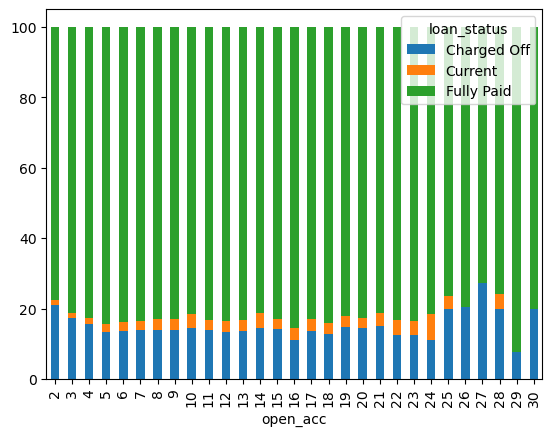

In [114]:
percentage_cal(loandata_pivot_accts,"Charged Off","Current","Fully Paid")
loandata_pivot_accts= loandata_pivot_accts.drop("total",axis=1)
loandata_pivot_accts.plot(kind="bar",stacked=True,x="open_acc")

In [115]:
Loan_groupby_Grade = loandata.groupby(['grade','loan_status'])['id'].count()
Loan_groupby_Grade= Loan_groupby_Grade.unstack()
Loan_groupby_Grade['Total'] = Loan_groupby_Grade['Charged Off'] + Loan_groupby_Grade['Current'] + Loan_groupby_Grade['Fully Paid']
Loan_groupby_Grade['Charged Off'] = (Loan_groupby_Grade['Charged Off']/Loan_groupby_Grade['Total'])*100
Loan_groupby_Grade['Current'] = (Loan_groupby_Grade['Current']/Loan_groupby_Grade['Total'])*100
Loan_groupby_Grade['Fully Paid'] = (Loan_groupby_Grade['Fully Paid']/Loan_groupby_Grade['Total'])*100

Loan_groupby_Grade = Loan_groupby_Grade.drop(columns = ['Total'])

Loan_groupby_Grade

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,5.969261,0.396629,93.634110
B,11.855241,2.870216,85.274542
C,16.633737,3.260064,80.106199
D,21.066516,4.183154,74.750330
E,25.158339,6.298381,68.543279
F,30.409914,6.959009,62.631077
G,31.962025,5.379747,62.658228


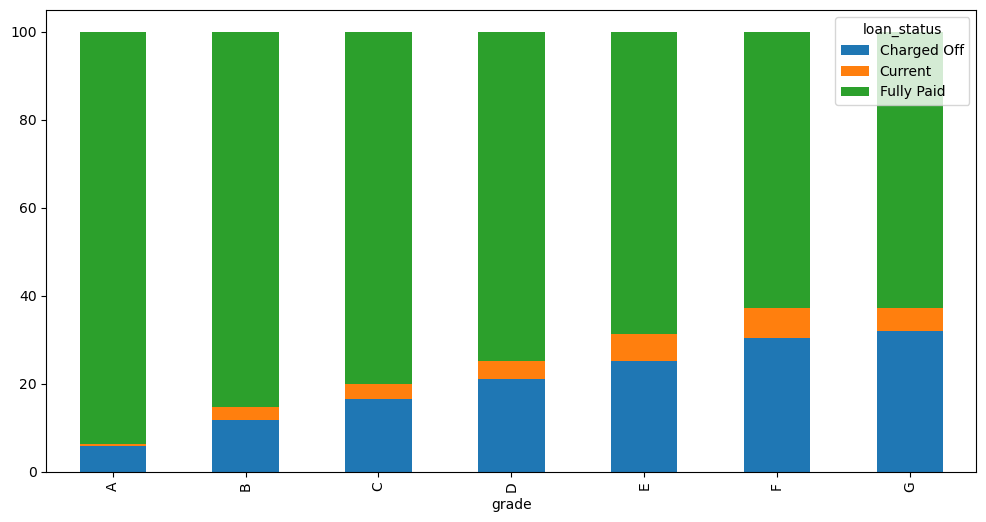

In [116]:
Loan_Plot = Loan_groupby_Grade.plot(kind='bar',stacked=True,figsize=(12,6))

In [117]:
Loan_groupby_Term = loandata.groupby(['term','loan_status'])['id'].count()
Loan_groupby_Term = Loan_groupby_Term.unstack()


Loan_groupby_Term = Loan_groupby_Term.fillna(0)

Loan_groupby_Term['Total'] = Loan_groupby_Term['Charged Off'] + Loan_groupby_Term['Current'] + Loan_groupby_Term['Fully Paid']
Loan_groupby_Term['Charged Off'] = (Loan_groupby_Term['Charged Off']/Loan_groupby_Term['Total'])*100
Loan_groupby_Term['Current'] = (Loan_groupby_Term['Current']/Loan_groupby_Term['Total'])*100
Loan_groupby_Term['Fully Paid'] = (Loan_groupby_Term['Fully Paid']/Loan_groupby_Term['Total'])*100
Loan_groupby_Term = Loan_groupby_Term.drop(columns = ['Total'])


Loan_groupby_Term

loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,11.090872,0.000000,88.909128
60 months,22.596742,10.733453,66.669805


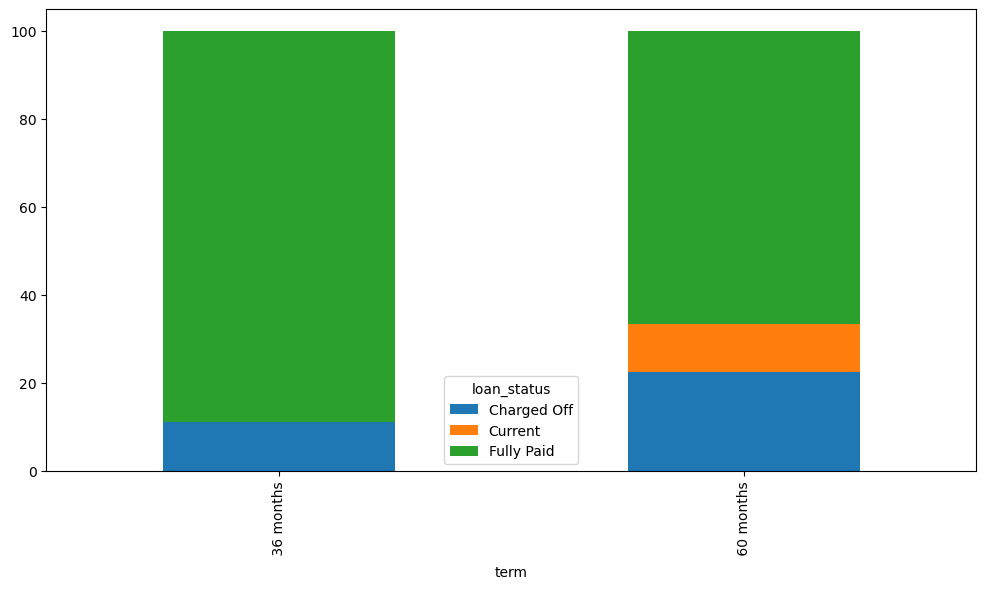

In [118]:
Loan_Plot3 = Loan_groupby_Term.plot(kind='bar',stacked=True,figsize=(12,6))

In [119]:
#Analysisng for the amount applied
def l_amt_Group(x):
    if (x['loan_amnt'] >= 0) and (x['loan_amnt'] <= 6000):
        return 'G1'
    elif (x['loan_amnt'] > 6000) and (x['loan_amnt'] <= 12000):
        return 'G2'
    elif (x['loan_amnt'] > 12000) and (x['loan_amnt'] <=18000):
        return 'G3'
    elif (x['loan_amnt'] > 18000) and (x['loan_amnt'] <= 24000):
        return 'G4'
    elif (x['loan_amnt'] > 24000) and (x['loan_amnt'] <= 30000):
        return 'G5'
    elif (x['loan_amnt'] > 30000) and (x['loan_amnt'] <= 36000 ):
        return 'G6'

LoanFunded_amt_group1 = loandata.assign(l_amt_Group=loandata.apply(l_amt_Group, axis=1))

LoanFunded_amt= LoanFunded_amt_group1.pivot_table(index=["l_amt_Group"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
LoanFunded_amt= LoanFunded_amt.reset_index()
LoanFunded_amt

LoanFunded_amt['Total'] = LoanFunded_amt['Charged Off'] + LoanFunded_amt['Current'] + LoanFunded_amt['Fully Paid']
LoanFunded_amt['Charged Off'] = (LoanFunded_amt['Charged Off']/LoanFunded_amt['Total'])*100
LoanFunded_amt['Current'] = (LoanFunded_amt['Current']/LoanFunded_amt['Total'])*100
LoanFunded_amt['Fully Paid'] = (LoanFunded_amt['Fully Paid']/LoanFunded_amt['Total'])*100

LoanFunded_amt = LoanFunded_amt.drop(columns = ['Total'])

LoanFunded_amt

loan_status,l_amt_Group,Charged Off,Current,Fully Paid
0,G1,13.222875,1.069734,85.707392
1,G2,12.938340,1.680304,85.381356
2,G3,14.859145,4.612465,80.528390
3,G4,16.554244,5.789770,77.655987
4,G5,18.016109,6.867317,75.116575
5,G6,21.739130,11.231884,67.028986


Text(4.444444444444452, 0.5, '% of status')

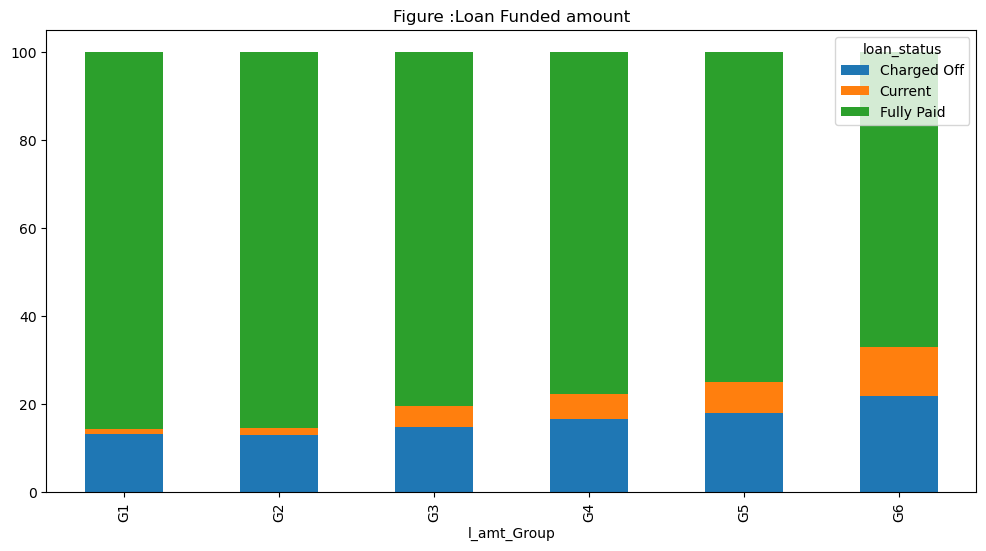

In [120]:
Loan_amnt_group = LoanFunded_amt.plot(kind='bar',stacked=True,title="Figure :Loan Funded amount",figsize=(12,6),x="l_amt_Group")
Loan_Plot3.set_xlabel("Loan Groups")
Loan_Plot3.set_ylabel("% of status")

In [121]:
#Higer the loan amountrevol_util
loandata.loc[pd.isnull(loandata["revol_util"]),"revol_util"]= 0
loandata["revol_util"]= loandata["revol_util"].str.replace("%","")
loandata["revol_util"]= loandata["revol_util"].astype(float)
revol_util_bins=[-1,0,20,40,60,80,100]
revol_util_names= ["0","0-20","20-40","40-60","60-80","80-100"]

loandata["revol_util_bin"]= pd.cut(loandata["revol_util"],bins=revol_util_bins,labels=revol_util_names)

loan_revol_util= loandata.groupby(["revol_util_bin","loan_status"])["id"].count().unstack()

loan_revol_util.reset_index(inplace=True)
loan_revol_util

loan_status,revol_util_bin,Charged Off,Current,Fully Paid
0,0,144,23,810
1,0-20,626,133,6180
2,20-40,915,220,6790
3,40-60,1236,257,7172
4,60-80,1356,286,6658
5,80-100,1334,221,5306


In [122]:
percentage_cal(loan_revol_util,"Charged Off","Current","Fully Paid")
loan_revol_util=loan_revol_util.drop("total",axis=1)
loan_revol_util

loan_status,revol_util_bin,Charged Off,Current,Fully Paid
0,0,14.738997,2.354145,82.906858
1,0-20,9.021473,1.916703,89.061824
2,20-40,11.545741,2.776025,85.678233
3,40-60,14.264282,2.965955,82.769763
4,60-80,16.337349,3.445783,80.216867
5,80-100,19.443230,3.221105,77.335665


<Axes: xlabel='revol_util_bin'>

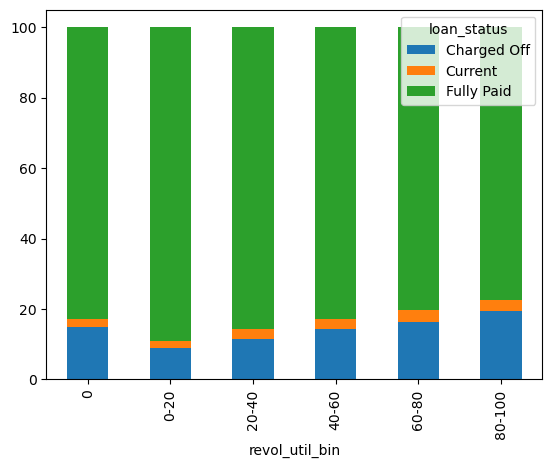

In [123]:
loan_revol_util.plot(kind="bar",stacked=True,x="revol_util_bin")

In [126]:
#creating a new variable, revol_bal_loan_ratio which will be loan_amount/revol_bal

loandata["revol_bal_loan_ratio"]= round((loandata["revol_bal"]/loandata["loan_amnt"])*100,2)
loandata["revol_bal_loan_ratio"].value_counts().sort_index(ascending=False)
loandata["revol_bal_loan_ratio"].describe()

count    39717.000000
mean       156.046136
std        267.042943
min          0.000000
25%         46.360000
50%         94.080000
75%        162.180000
max      13082.800000
Name: revol_bal_loan_ratio, dtype: float64

In [127]:
revol_bal_loan_ratio_bins= [-1,0,25,50,75,100,125,150,175,200,20000]
revol_bal_loan_ratio_labels= ["0","0-25","25-50","50-75","75-100","100-125","125-150","150-175","175-200",">200"]
loandata["revol_bal_loan_ratio_bins"]= pd.cut(loandata["revol_bal_loan_ratio"],bins=revol_bal_loan_ratio_bins,labels=revol_bal_loan_ratio_labels)
loandata.revol_bal_loan_ratio_bins.value_counts()

revol_bal_loan_ratio_bins
>200       7618
75-100     5559
50-75      5086
25-50      4920
0-25       4770
100-125    4662
125-150    2759
150-175    1963
175-200    1384
0           996
Name: count, dtype: int64

In [128]:
loandata_revol_ratio_pivot= loandata.groupby(["revol_bal_loan_ratio_bins","loan_status"])["id"].count().unstack()
loandata_revol_ratio_pivot.reset_index(inplace=True)
loandata_revol_ratio_pivot

loan_status,revol_bal_loan_ratio_bins,Charged Off,Current,Fully Paid
0,0,158,22,816
1,0-25,641,138,3991
2,25-50,780,162,3978
3,50-75,810,174,4102
4,75-100,762,196,4601
5,100-125,581,139,3942
6,125-150,368,87,2304
7,150-175,273,43,1647
8,175-200,195,35,1154
9,>200,1059,144,6415


<Axes: xlabel='revol_bal_loan_ratio_bins'>

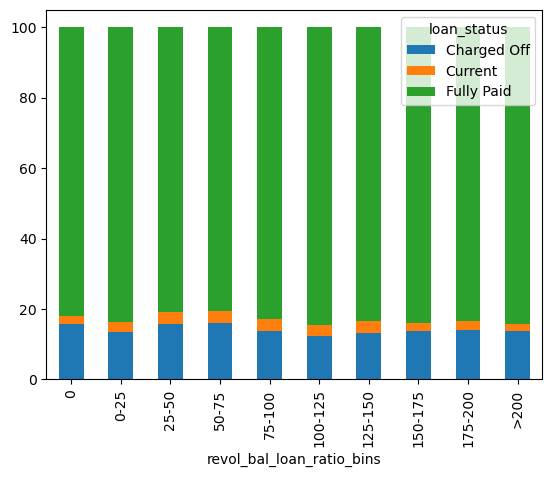

In [129]:
percentage_cal(loandata_revol_ratio_pivot,"Charged Off","Current","Fully Paid")
loandata_revol_ratio_pivot=loandata_revol_ratio_pivot.drop("total",axis=1)
loandata_revol_ratio_pivot.plot(kind="bar",stacked=True,x="revol_bal_loan_ratio_bins")

<Axes: xlabel='pub_rec'>

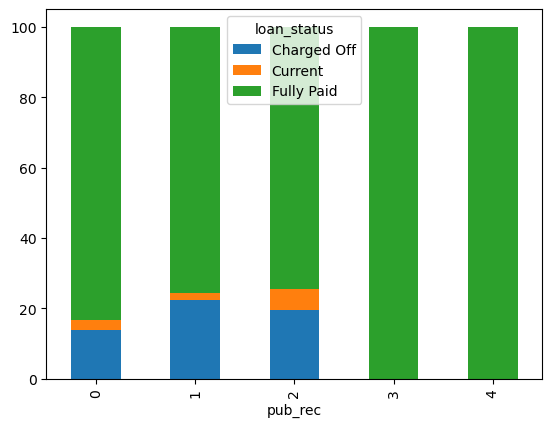

In [130]:
loandata_pub_rec_pivot= loandata.pivot_table(index="pub_rec",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_pub_rec_pivot.reset_index(inplace=True)
percentage_cal(loandata_pub_rec_pivot,"Charged Off","Current","Fully Paid")
loandata_pub_rec_pivot=loandata_pub_rec_pivot.drop("total",axis=1)
loandata_pub_rec_pivot.plot(kind="bar",stacked=True,x="pub_rec")

In [131]:
loandata.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

<Axes: xlabel='pub_rec_bankruptcies'>

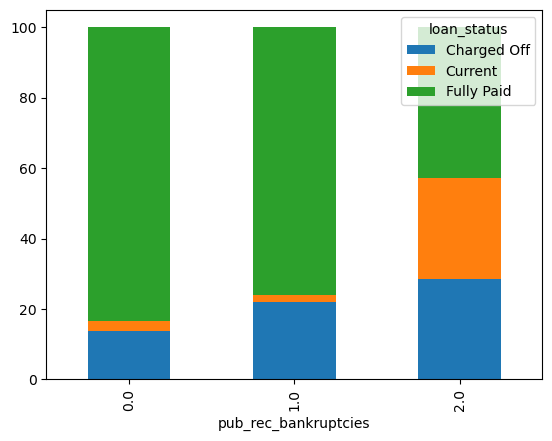

In [132]:
loandata_pub_rec_bankruptcies_pivot= loandata.pivot_table(index="pub_rec_bankruptcies",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_pub_rec_bankruptcies_pivot.reset_index(inplace=True)
percentage_cal(loandata_pub_rec_bankruptcies_pivot,"Charged Off","Current","Fully Paid")
loandata_pub_rec_bankruptcies_pivot=loandata_pub_rec_bankruptcies_pivot.drop("total",axis=1)
loandata_pub_rec_bankruptcies_pivot.plot(kind="bar",stacked=True,x="pub_rec_bankruptcies")

In [146]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [147]:
loandata["income_and_dti"]= loandata[["income_bins","dti_bins"]].apply(lambda x: "_".join(x),axis=1)
loandata.income_and_dti.value_counts()

KeyError: "None of [Index(['income_bins', 'dti_bins'], dtype='object')] are in the [columns]"

In [148]:
loandata_income_dti_pivot= loandata.pivot_table(index="income_and_dti",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loandata_income_dti_pivot=loandata_income_dti_pivot.reset_index()
loandata_income_dti_pivot

KeyError: 'income_and_dti'

In [149]:
loandata_pivoted_3= loandata.pivot_table(index=["income_bins","home_ownership"],values="id",columns="loan_status",aggfunc="count",fill_value=0)
loandata_pivoted_3.reset_index(inplace=True)
loandata_pivoted_3

KeyError: 'income_bins'